<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Loading-the-data-and-initial-check" data-toc-modified-id="Loading-the-data-and-initial-check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the data and initial check</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data-from-.csv-file" data-toc-modified-id="Loading-the-data-from-.csv-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading the data from .csv file</a></span></li><li><span><a href="#Variables" data-toc-modified-id="Variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variables</a></span><ul class="toc-item"><li><span><a href="#Renaming-of-some-columns" data-toc-modified-id="Renaming-of-some-columns-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Renaming of some columns</a></span></li><li><span><a href="#Further-variable-coding" data-toc-modified-id="Further-variable-coding-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Further variable coding</a></span></li></ul></li></ul></li><li><span><a href="#Understanding-your-data" data-toc-modified-id="Understanding-your-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding your data</a></span><ul class="toc-item"><li><span><a href="#Univariate-descriptive-analysis" data-toc-modified-id="Univariate-descriptive-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Univariate descriptive analysis</a></span><ul class="toc-item"><li><span><a href="#Risky" data-toc-modified-id="Risky-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Risky</a></span></li><li><span><a href="#Numerical-variables" data-toc-modified-id="Numerical-variables-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Numerical variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li><li><span><a href="#Descriptive-analysis" data-toc-modified-id="Descriptive-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Descriptive analysis</a></span><ul class="toc-item"><li><span><a href="#Some-small-analysis-examples-and-visualizations:" data-toc-modified-id="Some-small-analysis-examples-and-visualizations:-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Some small analysis examples and visualizations:</a></span></li></ul></li></ul></li><li><span><a href="#An-example-for-illustrative-purposes-only" data-toc-modified-id="An-example-for-illustrative-purposes-only-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>An example for illustrative purposes only</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></li><li><span><a href="#ROC-AUC-and-Gini-Coefficient" data-toc-modified-id="ROC-AUC-and-Gini-Coefficient-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ROC-AUC and Gini-Coefficient</a></span></li></ul></div>

# Settings

In [1]:
# NB settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

path = 'C:/Users/schmi/OneDrive/Uni/Teaching/Applied_RM/Sessions/'

# Loading the data and initial check

## Loading the data from .csv file

In [3]:
df = pd.read_csv(path + 'german_credit_data.csv', sep=',', index_col=0)

**Check you loaded file(s)!**

In [4]:
df.head(8)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good


In [5]:
df.tail(8)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


## Variables

**Description / Meaning of the variables**

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 
 + 0 - unemployed/unskilled - non-resident
 + 1 - unskilled and resident
 + 2 - skilled employee / official 
 + 3 - highly skilled / management / self-employed / officer
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (text - little, moderate, rich)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

### Renaming of some columns

Spaces and special characters are always bad!

In [7]:
df = df.rename(columns={'Credit amount': 'Credit_amount',
                        'Saving accounts': 'Saving_accounts',
                        'Checking account': 'Checking_account'})

### Further variable coding

First, we transform the variable `Risk` into a real boolean datatype.

In [8]:
df = df.rename(columns={'Risk': 'Risky'})
df.Risky = df.Risky.replace(['good', 'bad'], [False, True])

Second, it may be nice for figures etc. to have the variable `Job` labeled

In [9]:
df.Job = df.Job.replace([0,1,2,3],['unemp/-skilled / non-resident', '-skilled', 
                                   'skilled', '+skilled / selfemp'])

Third, the currency in the dataset is DM - in order to understand the data better it will be best to transform the credit amount into EUR, divide by fixed exchange rate of 1.95583

In [10]:
df.Credit_amount = np.round(df.Credit_amount / 1.95583, 2)

Check always your code if it performed the desired action

In [11]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risky
0,67,male,skilled,own,NaN,little,597.70,6,radio/TV,False
1,22,female,skilled,own,little,moderate,3042.70,48,radio/TV,True
2,49,male,-skilled,own,little,NaN,1071.67,12,education,False
3,45,male,skilled,free,little,little,4030.00,42,furniture/equipment,False
4,53,male,skilled,free,little,little,2489.99,24,car,True


# Understanding your data

## Univariate descriptive analysis

The datatype of the variables is important as it determines how you have to look at the data

In [12]:
catvar = [i for i in list(df.columns) if df[i].dtype=='O']
catvar

['Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account', 'Purpose']

In [13]:
numvar = [i for i in list(df.columns) if df[i].dtype in ['float64','int64']]

boolvar = 'Risky'

In [14]:
numvar

['Age', 'Credit_amount', 'Duration']

You should check for missing values right at the beginning - we will come to that later! For now, have in mind that there are missing values in the variable `Checking_account` and `Saving_accounts`. Furthermore, lets exchange the missing value `NA` with unknown for the moment. Obviously, don't do that if you have missing variables for numerical data (`NA` or `NaN` is consistent with floats, but `Unknown` is not).

In [15]:
df.isnull().sum().sort_values(ascending=False)

Checking_account    394
Saving_accounts     183
Risky                 0
Purpose               0
Duration              0
Credit_amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [16]:
df.Checking_account = df.Checking_account.replace(np.nan,'Unknown')
df.Saving_accounts = df.Saving_accounts.replace(np.nan,'Unknown')

### Risky

In [17]:
df.Risky.describe()

count      1000
unique        2
top       False
freq        700
Name: Risky, dtype: object

In [18]:
df.Risky.astype(float).describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Risky, dtype: float64

### Numerical variables

The usual descriptive statistics

In [19]:
df.describe()

,Age,Credit_amount,Duration
count,1000.000000,1000.00000,1000.000000
mean,35.546000,1672.56773,20.903000
std,11.375469,1443.24234,12.058814
min,19.000000,127.82000,4.000000
25%,27.000000,698.16500,12.000000
50%,33.000000,1185.94500,18.000000
75%,42.000000,2030.97750,24.000000
max,75.000000,9420.04000,72.000000


Histograms and Boxplots

In [37]:
df['log_credit_amount'] = np.log(df.Credit_amount)
df['Amount_by_month'] = df.Credit_amount / df.Duration

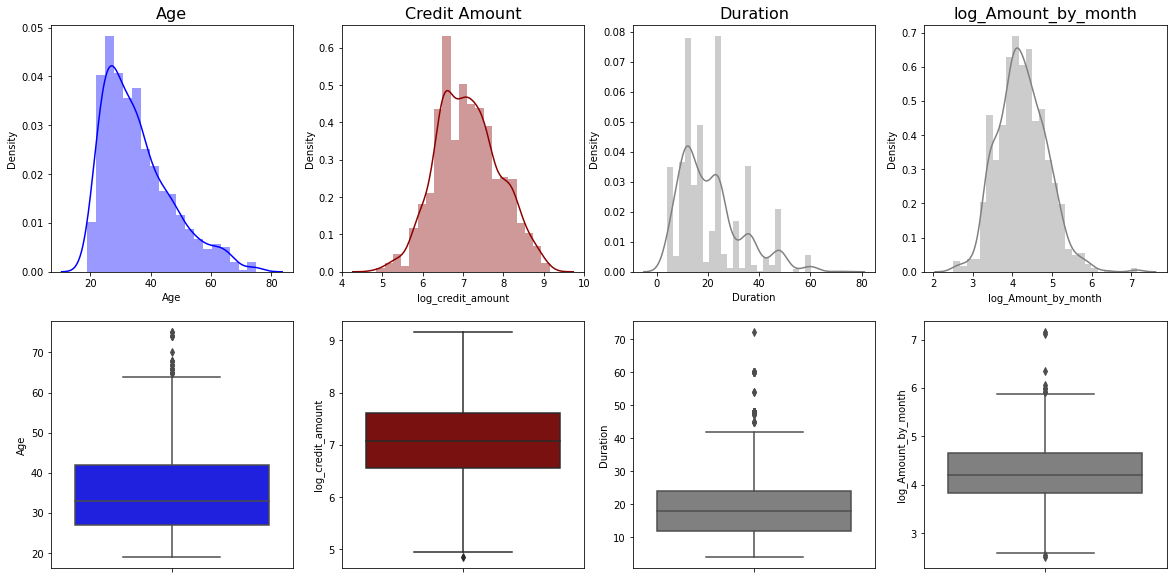

In [39]:
fig, ax = plt.subplots(2, 4, figsize=(20,10))

sns.distplot(df.Age, ax=ax[0,0], color="blue")
sns.boxplot(y='Age', data=df, ax=ax[1,0], color='blue')
ax[0,0].set_title("Age", fontsize=16)

sns.distplot((df.log_credit_amount), ax=ax[0,1], color="darkred")
sns.boxplot(y='log_credit_amount', data=df, ax=ax[1,1], color='darkred')
ax[0,1].set_title("Credit Amount", fontsize=16)

sns.distplot(df.Duration, ax=ax[0,2], color="gray")
sns.boxplot(y='Duration', data=df, ax=ax[1,2], color='gray')
ax[0,2].set_title("Duration", fontsize=16)

df['log_Amount_by_month'] = np.log(df['Amount_by_month'])
sns.distplot(df.log_Amount_by_month, ax=ax[0,3], color="gray")
sns.boxplot(y='log_Amount_by_month', data=df, ax=ax[1,3], color='gray')
ax[0,3].set_title("log_Amount_by_month", fontsize=16)

plt.show()

Check out wired behavior of distribution - is there some logic embedded?

In [ ]:
df.Duration.value_counts().head(10)

### Categorical variables

In [40]:
N = df.shape[0]

for i in catvar:
    print('============================================')
    print(f'Variable: {i} \n')
    x1 = df[i].value_counts()
    x2 = x1 / np.sum(x1) * 100
    x = pd.concat([x1,x2], axis=1)
    x.columns = ['Count', 'in %']
    print(x)
    print()

Variable: Sex 

        Count  in %
male      690  69.0
female    310  31.0

Variable: Job 

                               Count  in %
skilled                          630  63.0
-skilled                         200  20.0
+skilled / selfemp               148  14.8
unemp/-skilled / non-resident     22   2.2

Variable: Housing 

      Count  in %
own     713  71.3
rent    179  17.9
free    108  10.8

Variable: Saving_accounts 

            Count  in %
little        603  60.3
Unknown       183  18.3
moderate      103  10.3
quite rich     63   6.3
rich           48   4.8

Variable: Checking_account 

          Count  in %
Unknown     394  39.4
little      274  27.4
moderate    269  26.9
rich         63   6.3

Variable: Purpose 

                     Count  in %
car                    337  33.7
radio/TV               280  28.0
furniture/equipment    181  18.1
business                97   9.7
education               59   5.9
repairs                 22   2.2
vacation/others         12   1.2
d

## Descriptive analysis

for example: 

* how is gender related to all the other independent variables
* or age, the purpose, etc.

Of course, understanding the relationship and dependencies between the independent variables as well as between the independent variables and the target variable is important. Be careful, non-linear relationships and interaction effects may exist as well. Furthermore, remember that correlation does not mean causation.

### Some small analysis examples and visualizations:

In [41]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risky', 'Risky_Dum',
       'log_credit_amount', 'Amount_by_month', 'log_Amount_by_month'],
      dtype='object')

In [42]:
df[numvar+[boolvar]].corr()

,Age,Credit_amount,Duration,Risky
Age,1.000000,0.032716,-0.036136,-0.091127
Credit_amount,0.032716,1.000000,0.624984,0.154739
Duration,-0.036136,0.624984,1.000000,0.214927
Risky,-0.091127,0.154739,0.214927,1.000000


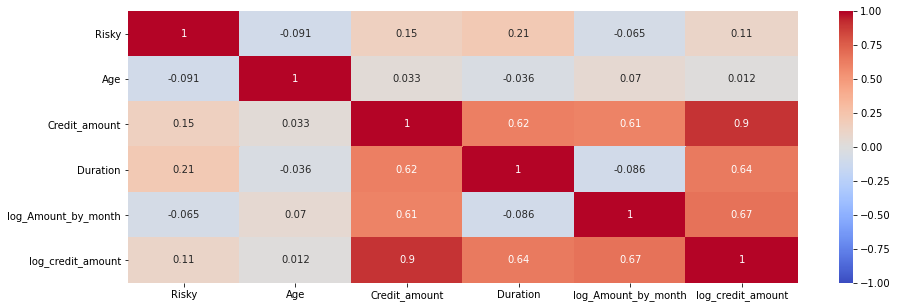

In [43]:
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df[[boolvar]+numvar+['log_Amount_by_month', 'log_credit_amount']].corr(method='pearson'), 
            annot=True,cmap="coolwarm",
            vmin=-1, vmax=1, ax=ax);

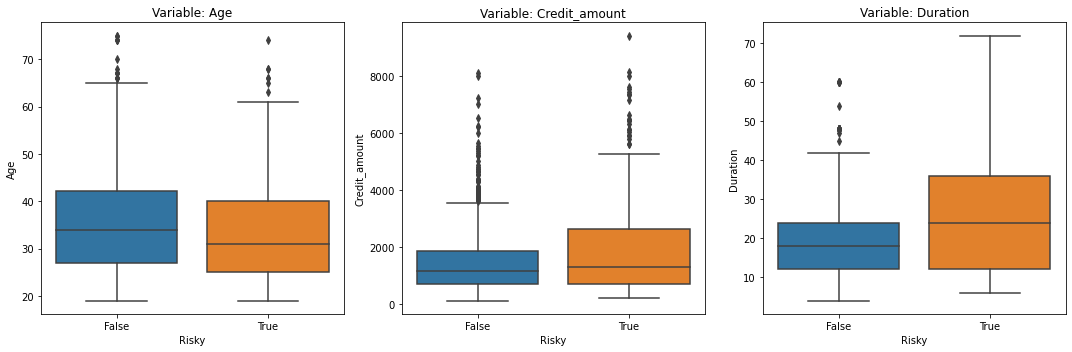

In [44]:
fig, axes = plt.subplots(1,len(numvar), figsize=(len(numvar)*5,5))
row = 0

for i in numvar:   
    sns.boxplot(x=df.Risky, y=df[i], whis=1.5, ax=axes[row])
    axes[row].set_title("Variable: {}".format(i))
    row += 1
    
fig.tight_layout()

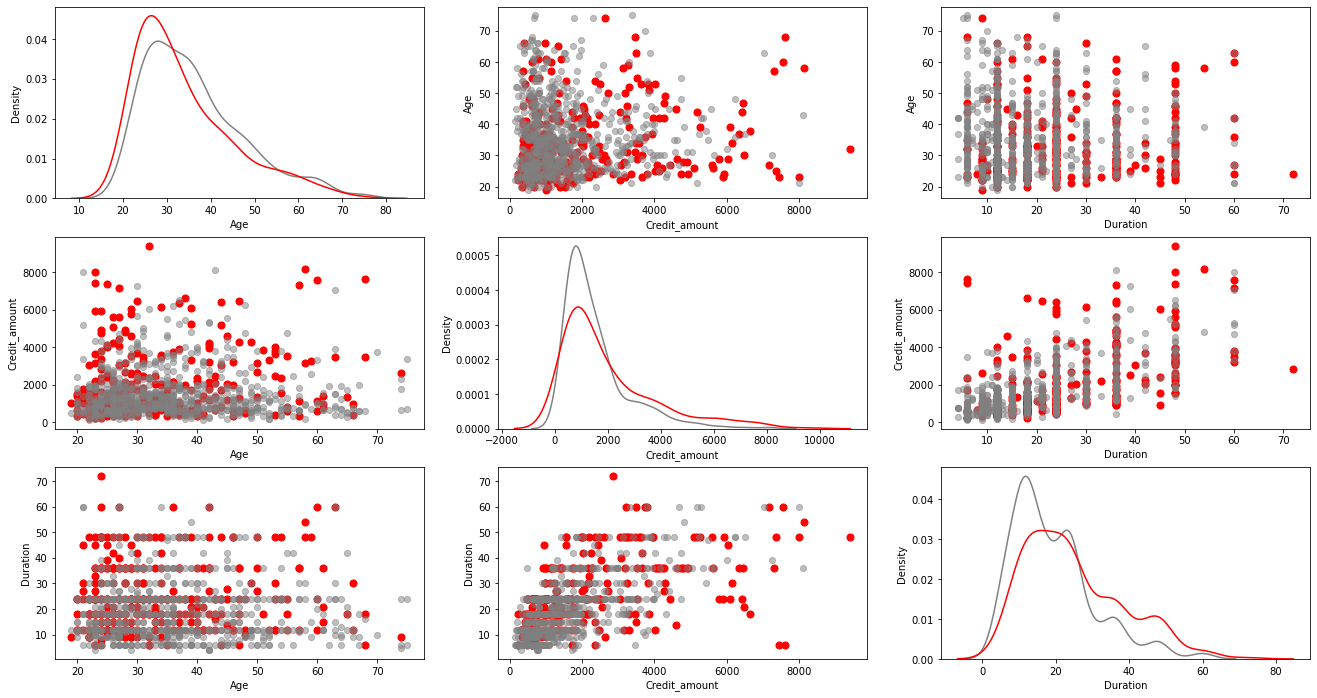

In [45]:
kde_options = {} # {'cut': 0, 'bw':2}
rug_options = {'height': 0.1}

f, axes = plt.subplots(len(numvar), len(numvar),figsize=(7.5*len(numvar),4*len(numvar)))
row = 0

for counter in np.arange(0,len(numvar)):
    v = numvar[counter]
        
    sns.distplot(df[v].loc[df.Risky==False], hist=False, rug=False, color="gray", ax=axes[counter,counter], 
                 rug_kws=rug_options, kde_kws=kde_options)
    sns.distplot(df[v].loc[df.Risky==True], hist=False, rug=False, color="red", ax=axes[counter,counter], 
                 rug_kws=rug_options, kde_kws=kde_options)
    
    col = 0
    for i in numvar:
        if i==v:
            col +=1
            continue
                
        axes[row,col].scatter(df.loc[df.Risky==True, i], df.loc[df.Risky==True, v], c="Red",marker=".",s=200)
        axes[row,col].scatter(df.loc[df.Risky==False, i], df.loc[df.Risky==False, v], c="Gray",marker=".",alpha=0.5,s=150)
        
        axes[row,col].set_xlabel(i)
        axes[row,col].set_ylabel(v)
        col += 1
    row += 1

In [46]:
df.groupby('Purpose').Risky.mean()

Purpose
business               0.350515
car                    0.314540
domestic appliances    0.333333
education              0.389831
furniture/equipment    0.320442
radio/TV               0.221429
repairs                0.363636
vacation/others        0.416667
Name: Risky, dtype: float64

In [47]:
for i in catvar:
    tmp1 = pd.crosstab(df['Risky'], df[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(True, ascending=False)
    tmp2 = pd.crosstab(df['Risky'], df[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  Sex
---------------------------------------------------
        False   True  N_False  N_True    N  N_Perc
Sex                                               
female  64.84  35.16      201     109  310    31.0
male    72.32  27.68      499     191  690    69.0

Variable:  Job
---------------------------------------------------
                               False   True  N_False  N_True    N  N_Perc
Job                                                                      
+skilled / selfemp             65.54  34.46       97      51  148    14.8
unemp/-skilled / non-resident  68.18  31.82       15       7   22     2.2
skilled                        70.48  29.52      444     186  630    63.0
-skilled                       72.00  28.00      144      56  200    20.0

Variable:  Housing
---------------------------------------------------
         False   True  N_False  N_True    N  N_Perc
Housing                                            
free     59.26  40.74       64      44  1

# An example for illustrative purposes only

## Linear Regression

**Always a good idea?**

In [48]:
df.Risky.mean()

0.3

In [1]:
df['Risky_Dum'] = df.Risky.astype(int)
mod = smf.ols(formula='Risky_Dum ~ Duration', data=df)
res = mod.fit()
print(res.summary2())

NameError: name 'df' is not defined

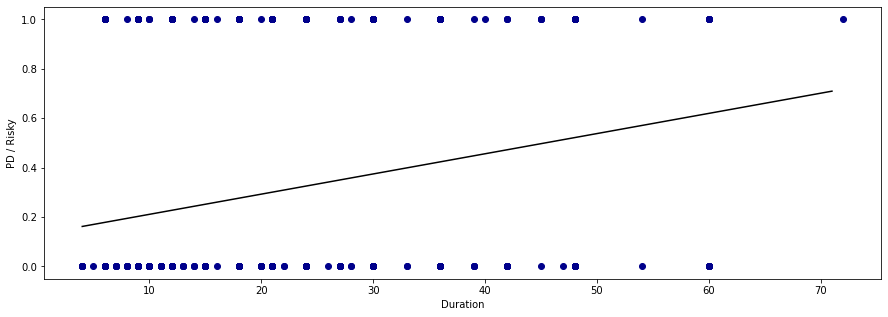

In [50]:
fig, ax = plt.subplots(1, figsize=(15,5))

xs = np.arange(df.Duration.min(), df.Duration.max(), 1)

ys = res.params[0] + res.params[1] * xs

ax = plt.scatter(df.Duration, df.Risky_Dum, color='darkblue')
ax = plt.plot(xs,ys, color='black')

plt.xlabel('Duration')
plt.ylabel('PD / Risky');

It makes sense to run a OLS regression for binary variable, because it can be shown that it delivers an estimate for $P(\text{default}=\text{True}|X)$.

**Nevertheless**
* some of our estimates might be outside the [0, 1] interval -- hard to interpret as probabilities
* the marginal effect of an variable is independent of it's level (e.g. the effect of an increase of the  of 100 on the PD is the same for everybody, independent of the \textt{balance} level (0 vs. 1500)  )
*  ...

What happens if someone applies for a loan with an amount of 1 EUR ? 

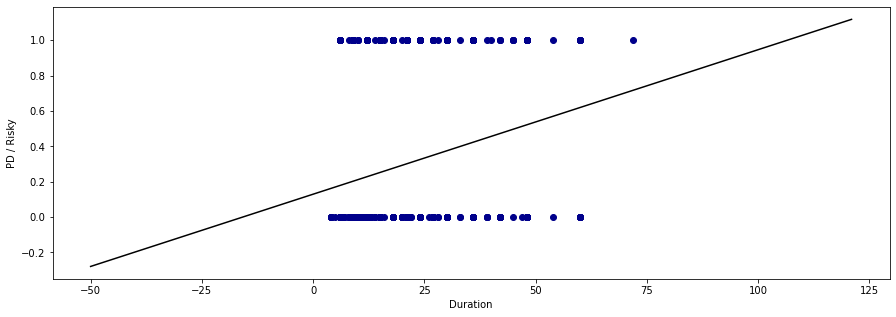

In [51]:
fig, axes = plt.subplots(figsize=(15,5))

xst = np.arange(-50, df.Duration.max()+50, 1)
yst = res.params[0] + res.params[1] * xst

axes = plt.scatter(df.Duration, df.Risky_Dum, color='darkblue')
axes = plt.plot(xst,yst, color='black')

plt.xlabel('Duration')
plt.ylabel('PD / Risky');

## Logistic regression

approach to model $P(\text{default}=\text{True}|X)$ using a function that gives outputs between 0 and 1 for all values of $X$
\begin{eqnarray*}
		p(\text{default=True}|X) = \dfrac{e^{\boldsymbol{X}'\boldsymbol{b}}}{1 + e^{\boldsymbol{X}'\boldsymbol{b}}} \\[2ex]
		\text{Odds: } \; \dfrac{p(\text{default=True}|X)}{1- p(\text{default=True}|X)} = e^{\boldsymbol{X}'\boldsymbol{b}} > 0\\[2ex] 
		\text{Log-Odds: } \; \ln\Big(\dfrac{p(\text{default=True}|X)}{1- p(\text{default=True}|X)}\Big) = {\boldsymbol{X} ' \boldsymbol{b}} \\
	\end{eqnarray*}

In [52]:
res2 = sm.Logit.from_formula('Risky_Dum ~ Duration + 1', data=df).fit(disp=False, maxiter=100)
print(res2.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.037     
Dependent Variable: Risky_Dum        AIC:              1181.1138 
Date:               2020-11-21 16:19 BIC:              1190.9293 
No. Observations:   1000             Log-Likelihood:   -588.56   
Df Model:           1                LL-Null:          -610.86   
Df Residuals:       998              LLR p-value:      2.3987e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -1.6664    0.1466  -11.3654  0.0000  -1.9537  -1.3790
Duration      0.0375    0.0057    6.5825  0.0000   0.0264   0.0487



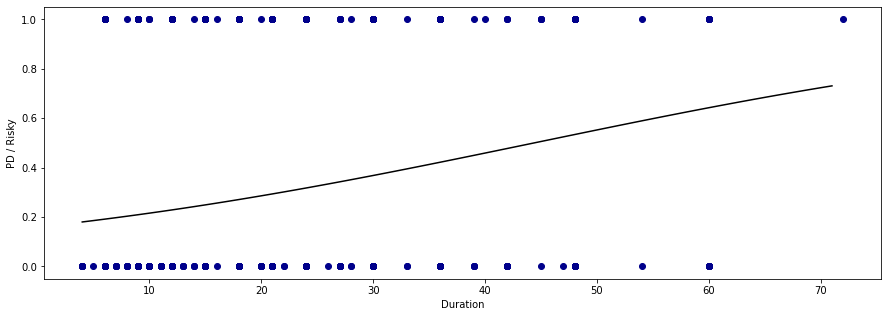

In [53]:
fig, axes = plt.subplots(figsize=(15,5))

ys2 = res2.predict(exog=pd.DataFrame({'Duration': xs}), transform=True)

axes = plt.scatter(df.Duration, df.Risky, color='darkblue')
axes = plt.plot(xs,ys2, color='black')

plt.xlabel('Duration')
plt.ylabel('PD / Risky');

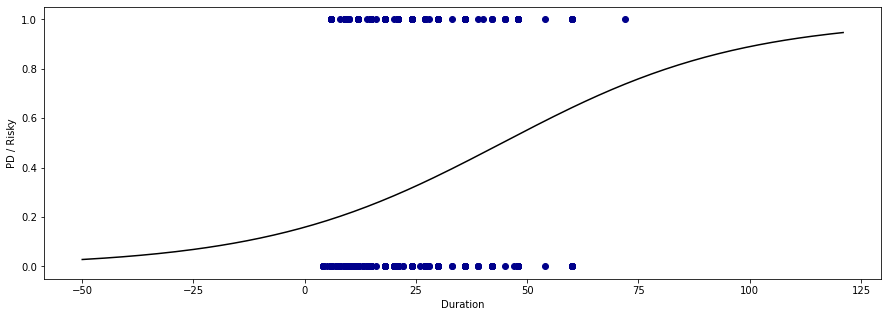

In [54]:
fig, axes = plt.subplots(figsize=(15,5))

xs = np.arange(-50,df.Duration.max()+50)

ys2 = res2.predict(exog=pd.DataFrame({'Duration': xs}))

axes = plt.scatter(df.Duration, df.Risky_Dum, color='darkblue')
axes = plt.plot(xs,ys2, color='black')

plt.xlabel('Duration')
plt.ylabel('PD / Risky');

# ROC-AUC and Gini-Coefficient

In [55]:
pd_pred = res2.predict(exog=df)
pd_pred.head()

0    0.191371
1    0.533813
2    0.228659
3    0.477573
4    0.317465
dtype: float64

In [56]:
pd_pred.mean()

0.3000000000000001

In [57]:
fpr, tpr, thresholds = metrics.roc_curve(df.Risky_Dum, pd_pred)
auc = metrics.auc(fpr, tpr)
auc

0.6285928571428572

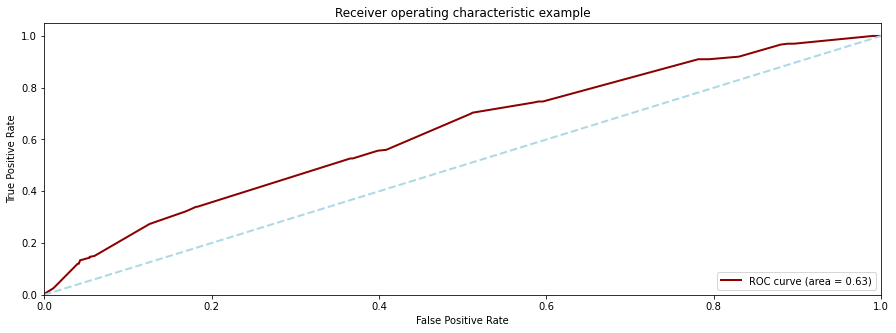

In [58]:
fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

To compute the Gini coefficient, you can simply use the linear relationship between both 

\begin{eqnarray*}
Gini &=& 2\cdot AUC -1 \\
     &=& 2 \cdot (AUC - 0.5)
\end{eqnarray*}

In [59]:
gini = 2 * auc -1
gini

0.25718571428571435